In [1]:
import numpy as np
import math
import math
from matplotlib import pyplot as plt

Output Flow Rate: 2659.88 mL/s


Text(0.5,1,'Torque required vs RPM')

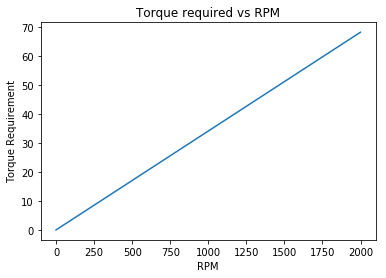

In [2]:
#Define constants of power screw
powerScrewPitch = 0.00508 #m/rotation
powerScrewMajorDiameter = 0.01905 #m
frictionCoeff = 0.2
threadAngle = 29  #degrees
pistonDiameter = 0.1 #m

pistonArea = math.pi*(pistonDiameter)**2 #mm^2

#Define useful functions
def calculatePerformance(rpm,cost):
    return (calculateOutputFlow(rpm)/cost)

#Returns mL/s
def calculateOutputFlow(rpm):
    pistonVelocity = findPistonVelocity(rpm,powerScrewPitch)
    return pistonVelocity * pistonArea * 10**(6)
    
def calculateMeanDiameter(majorDiameter, pitch):
    return majorDiameter - pitch/2

def secant(angle):
    return 1/math.cos(angle)

#Returns m/s units
def findPistonVelocity(rpm,powerScrewPitch):
    rotationsPerSec = rpm/60.0
    return rotationsPerSec*powerScrewPitch

#Returns pressure in Pa units
def findPressure(pistonVelocity):
    return (5*10**6)*pistonVelocity

#Returns force in N units
def findForce(pistonPressure):
    return pistonPressure*pistonArea

#F: force applied to piston
#l: pitch of power screw
#dm: major diameter
#f: friction coefficient
#alpha: pitch angle
def powerScrewTorque(F,l,dm,f,alpha):
    Torque = ((F*dm)/2)*((l+math.pi*f*dm*secant(alpha*(math.pi/180)))/(math.pi*dm-f*l*secant(alpha*(math.pi/180))))
    return Torque

powerScrewMeanDiameter = calculateMeanDiameter(powerScrewMajorDiameter,powerScrewPitch)

#Create array of possible RPM's to graph
rpm = np.arange(0,2000,1)

pistonVelocity = findPistonVelocity(rpm,powerScrewPitch)
chamberPressure = findPressure(pistonVelocity)
requiredForce = findForce(chamberPressure)

print("Output Flow Rate: %.2f mL/s" % calculateOutputFlow(1000))

plt.plot(rpm,powerScrewTorque(requiredForce,powerScrewPitch,powerScrewMeanDiameter,frictionCoeff,threadAngle/2))
plt.xlabel("RPM")
plt.ylabel("Torque Requirement")
plt.title("Torque required vs RPM")